In [1]:
#  Setup & Imports

import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

INFO:load_data:✅ CSV loaded: C:\Users\mashel\Desktop\econ_churn\data\raw\orders.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1000 non-null   object 
 1   customer_id     1000 non-null   object 
 2   product_id      1000 non-null   object 
 3   order_date      1000 non-null   object 
 4   quantity        1000 non-null   int64  
 5   price           1000 non-null   float64
 6   discount        1000 non-null   float64
 7   payment_method  1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


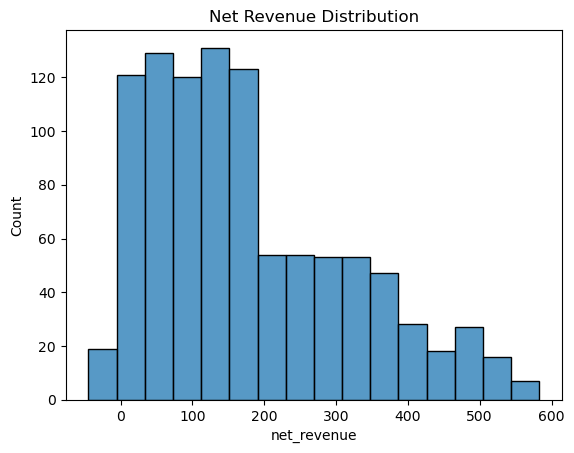

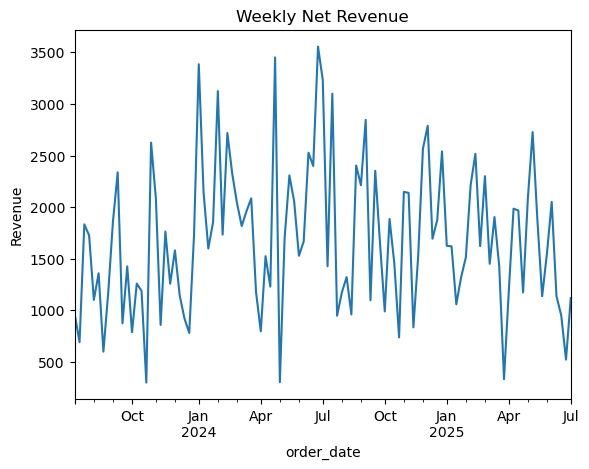

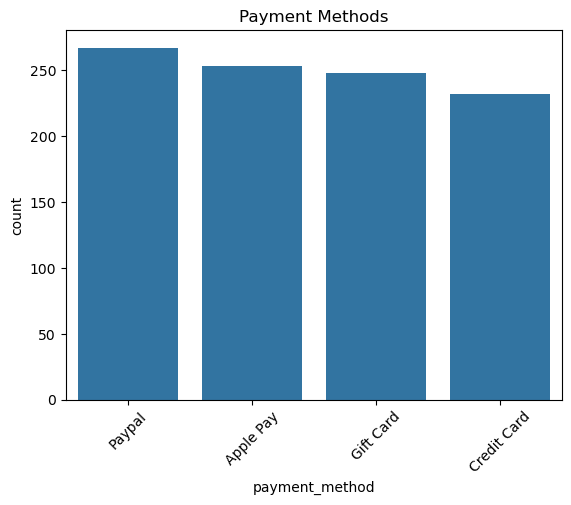

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


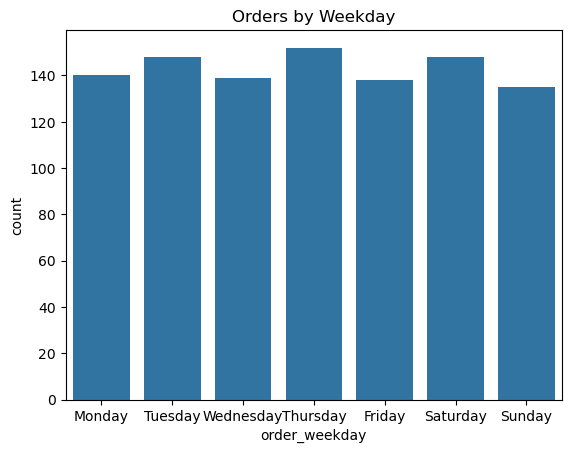

INFO:load_data:💾 Saved CSV to: C:\Users\mashel\Desktop\econ_churn\data\processed\orders_clean.csv


In [2]:
sys.path.append(str((Path().resolve().parent / "src" / "utils").resolve()))
from load_data import load_csv, save_csv

# Load Raw Data
df = load_csv("orders.csv")


# Initial Exploration
df.head()
df.info()
df.describe()
df['payment_method'].value_counts()


# Data Cleaning
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove negative/zero quantities or prices
df = df[(df['quantity'] > 0) & (df['price'] > 0)]

# Fill missing discounts with 0
df['discount'] = df['discount'].fillna(0)

# Standardize payment method
df['payment_method'] = df['payment_method'].str.strip().str.title()


# Feature Engineering
# Total Revenue per row
df['gross_revenue'] = df['price'] * df['quantity']
df['discount_amount'] = df['discount'] * df['quantity']
df['net_revenue'] = df['gross_revenue'] - df['discount_amount']

# Order Month
df['order_month'] = df['order_date'].dt.to_period("M")

# Weekday
df['order_weekday'] = df['order_date'].dt.day_name()


# Exploratory Data Analysis
# Net revenue distribution
sns.histplot(df['net_revenue'])
plt.title("Net Revenue Distribution")
plt.show()

# Orders over time
df.set_index('order_date')['net_revenue'].resample('W').sum().plot()
plt.title("Weekly Net Revenue")
plt.ylabel("Revenue")
plt.show()

# Top payment methods
sns.countplot(x='payment_method', data=df, order=df['payment_method'].value_counts().index)
plt.title("Payment Methods")
plt.xticks(rotation=45)
plt.show()

# Order volume by weekday
sns.countplot(x='order_weekday', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Orders by Weekday")
plt.show()


# Save Cleaned File
save_csv(df, "orders_clean.csv")
